In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline  

### Load the data

In [2]:
data = pd.read_csv("data/ex1data1.txt", header=None)

In [3]:
data.columns = ['population', 'profit']

In [4]:
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


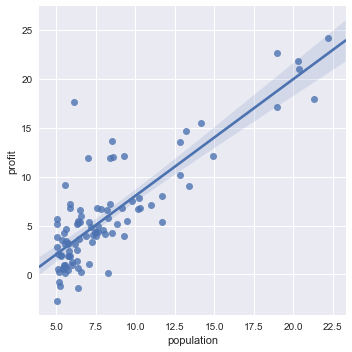

In [5]:
sns.lmplot(x='population', y='profit',data=data)

In [6]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


The range of features are not too different

###### Cost Function
<img src="img/costFunction.png">


In [7]:
def h(theta, X):
    return np.dot(X,theta)

def cost_function(theta, features, labels):
    """
    >>>cost_function([1,1,1], [[1,2],[2,3]], [1, 2])
    6.25
    
    """
    theta = np.array(theta)
    features = np.array(features)
    labels = np.array(labels)
        
    m = features.shape[0]
    X = np.c_[np.ones(m), features]
    hx = h(theta, X)
    sq = np.square(hx-labels)
    return sq.sum()/(2*m)

Setting a 'theta' it's possible to see if we have a convex function

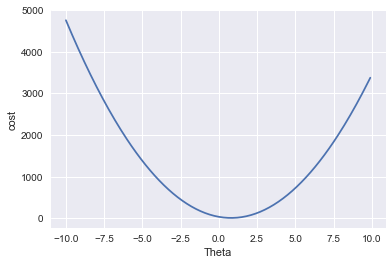

In [8]:
theta = np.arange(-10,10,0.1)
thetas = np.c_[np.zeros(len(theta)), theta]
J = [cost_function(theta, data['population'], data['profit']) for theta in thetas]
plt.plot(thetas[:,1], J)
plt.xlabel('Theta')
plt.ylabel('cost')
plt.show()

#### Gradient Descent
<img src="img/gradientDescent.png">

In [9]:
def next_thetas(theta, alpha, features, label):
    m = features.shape[0]
    X = np.c_[np.ones(m), features]

    return theta - alpha/m*((h(theta, X)-label).T).dot(X)


#### Linear Regression

In [10]:
%%time
features = data['population']
label = data['profit']
i = 0
thetas = [1 , 1] 
alpha = 0.01
Js = []
Jb = 100
J = 10
while(i<1e4 and abs(J-Jb)>1e-5):
    thetas = next_thetas(thetas, alpha, features, label)
    Jb = J
    J = cost_function(thetas, features, label)
    Js.append(J)
    i += 1

Wall time: 1.36 s


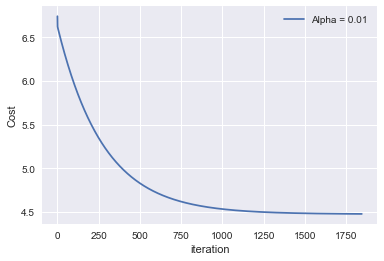

In [11]:
plt.plot(range(i), Js)
plt.xlabel('iteration')
plt.ylabel('Cost')
plt.legend(["Alpha = "+ str(alpha)])
plt.show()

##### Normal Equations
<img src="img/normal.png">

In [12]:
def normal(features, label):
    m = features.shape[0]
    X = np.c_[np.ones(m), features]
    return (np.linalg.inv(X.T.dot(X))).dot(X.T.dot(label))

In [13]:
%%time
thetas_n = normal(features, label)

Wall time: 0 ns


In [14]:
J_n = cost_function(thetas_n, features, label)
print('G. D.: ' + str(thetas) + '\n' + 'N. E.: ' + str(thetas_n))
print('Cost G. D.: ' + str(J) + '\n' + 'Cost N. E.: ' + str(J_n))

G. D.: [-3.72171291  1.17554663]
N. E.: [-3.89578088  1.19303364]
Cost G. D.: 4.47972983901
Cost N. E.: 4.47697137598


In [15]:
from sklearn.linear_model import LinearRegression

m = features.shape[0]
X = np.c_[np.ones(m), features]
reg = LinearRegression()
reg.fit(X[:,1].reshape(-1,1), label.ravel())


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

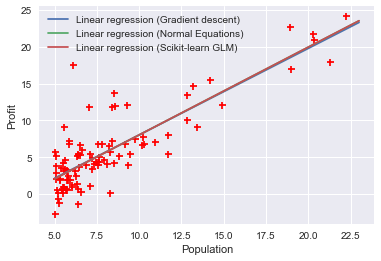

In [16]:
plt.scatter(features, label,c='r', marker='+')
plt.plot([5,23], h(thetas, [[1,5],[1,23]]))
plt.plot([5,23], h(thetas_n, [[1,5],[1,23]]))
plt.plot([5,23], h([reg.intercept_,reg.coef_], [[1,5],[1,23]]))

plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend(['Linear regression (Gradient descent)',
            'Linear regression (Normal Equations)', 
            'Linear regression (Scikit-learn GLM)'])

plt.show()

# Second Problem: more dimensions (two features)

In [17]:
data = pd.read_csv("data/ex1data2.txt", header=None)

In [18]:
data.columns = ['size','n_of_bedrooms', 'price']
data.head(3)

,size,n_of_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000


Feature scaling can make gradient descent converge
much more quickly

In [19]:
data.describe()

,size,n_of_bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


###### Mean Normalization

In [20]:
data_norm1 = (data-data.mean())/data.std()
data_norm2 = (data-data.mean())/(data.max()-data.min())

In [21]:
data_norm1.describe()

,size,n_of_bedrooms,price
count,4.700000e+01,4.700000e+01,4.700000e+01
mean,1.889741e-17,2.279500e-16,-8.031401e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.445423e+00,-2.851859e+00,-1.363666e+00
25%,-7.155897e-01,-2.236752e-01,-7.238702e-01
50%,-1.417900e-01,-2.236752e-01,-3.239979e-01
75%,3.376348e-01,1.090417e+00,3.521863e-01
max,3.117292e+00,2.404508e+00,2.874981e+00


In [22]:
data_norm2.describe()

,size,n_of_bedrooms,price
count,4.700000e+01,4.700000e+01,4.700000e+01
mean,3.543265e-18,4.960571e-17,-2.007850e-17
std,2.191678e-01,1.902455e-01,2.359243e-01
min,-3.167901e-01,-5.425532e-01,-3.217220e-01
25%,-1.568342e-01,-4.255319e-02,-1.707786e-01
50%,-3.107580e-02,-4.255319e-02,-7.643898e-02
75%,7.399866e-02,2.074468e-01,8.308932e-02
max,6.832099e-01,4.574468e-01,6.782780e-01


In [23]:
features = [data_norm1[['size', 'n_of_bedrooms']], data_norm2[['size', 'n_of_bedrooms']]]
labels   = [data_norm1['price'], data_norm2['price']]

###### Linear Regression

For the first normalization with the std

In [24]:
%%time
i1 = 0
thetas1 = np.ones(features[0].shape[1]+1)
alpha = 0.05
Js1 = []
Jb = 100
J = 10
while(i1<1e4 and abs(J-Jb)>1e-5):
    thetas1 = next_thetas(thetas1, alpha, features[0], labels[0])
    Jb = J
    J = cost_function(thetas1, features[0], labels[0])
    Js1.append(J)
    i1 += 1

Wall time: 140 ms


For the second normalization with the range

In [25]:
%%time
i2 = 0
thetas2 = np.ones(features[1].shape[1]+1)
Js2 = []
Jb = 100
J = 10
while(i2<1e4 and abs(J-Jb)>1e-5):
    thetas2 = next_thetas(thetas2, alpha, features[1], labels[1])
    Jb = J
    J = cost_function(thetas2, features[1], labels[1])
    Js2.append(J)
    i2 += 1

Wall time: 389 ms


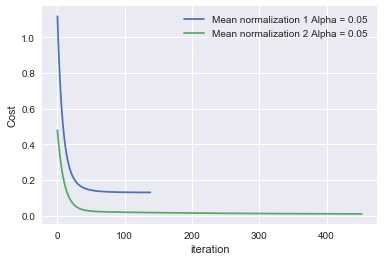

In [26]:
plt.plot(range(i1), Js1)
plt.plot(range(i2), Js2)
plt.xlabel('iteration')
plt.ylabel('Cost')
plt.legend(["Mean normalization 1 Alpha = "+ str(alpha),"Mean normalization 2 Alpha = "+ str(alpha)])

plt.show()

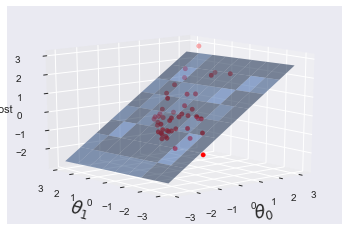

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(features[0].T.values[0], features[0].T.values[1], labels[0], c = 'r')

B0 = np.linspace(-3, 3, 9)
B1 = np.linspace(-3, 3, 9)
Z = np.zeros((B0.size,B1.size))

xx, yy = np.meshgrid(B0, B1, indexing='xy')

for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = h(thetas1, [1, xx[i,j], yy[i,j]])

# plot the surface
ax.plot_surface(xx, yy, Z, alpha = 0.6)

ax.view_init(elev=15, azim=230)

ax.set_xlabel(r'$\theta_0$', fontsize=17)
ax.set_ylabel(r'$\theta_1$', fontsize=17)
ax.set_zlabel('Cost')




#### Animation

Wall time: 1min 39s


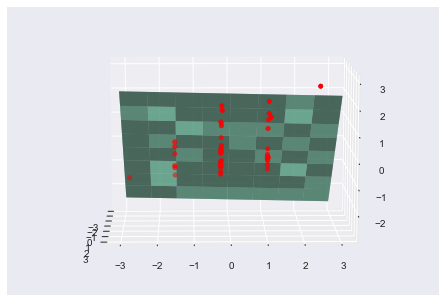

In [29]:
%%time
from matplotlib import animation


def randrange(n, vmin, vmax):
    return (vmax - vmin) * np.random.rand(n) + vmin
n = 100


fig = plt.figure()
ax = Axes3D(fig)

def init():
    ax.plot_surface(xx, yy, Z, alpha = 0.6)
    ax.scatter(features[0].T.values[0], features[0].T.values[1], labels[0], c = 'r')
    
    return fig,

def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
# Save
anim.save('video/LinearRegression.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

<video controls src="video/LinearRegression.mp4"/>